# 2. Data Wrangling

## 2.1 Contents
* [2. Data Wrangling](#2-Data-Wrangling)
    * [2.1 Contents](#2.1-Contents)
    * [2.2 Introduction](#2.2-Introduction)
    * [2.3 Imports](#2.3-Imports)
    * [2.4 Load The Water Quality Data](#2.4-Load-The-Water-Quality-Data)
    * [2.5 Explore the Data](#2.5-Explore-the-Data)
        * [2.5.1 Select Relevant Columns](#2.5.1-Select-Relevant-Columns)
    * [2.6 Handling Missing Values](#2.6-Handling-Missing-Values)
        * [2.6.1 Numeric Data](#2.6.1-Numeric-Data)
        * [2.6.2 Distribution of Feature Values](#2.6.2-Distribution-of-Feature-Values)
            * [2.6.2.1 Temperature](#2.6.2.1-Temperature)
            * [2.6.2.2 pH](#2.6.2.2-pH)
            * [2.6.2.3 TN (mg/L) - Total Nitrogen](#2.6.2.3-TN-mg-L-Total-Nitrogen)
            * [2.6.2.4 TP (mg/L) - Total Phosphorus](#2.6.2.4-TP-mg-L-Total-Phosphorus)
            * [2.6.2.5 Chla (mg/L) - Chlorophyll-a](#2.6.2.5-Chla-mg-L-Chlorophyll-a)
            * [2.6.2.6 Turbidity (NTU)](#2.6.2.6-Turbidity-NTU)
        * [2.6.3 Review Distribution of Feature Values](#2.6.3-Review-Distribution-of-Feature-Values)
    * [2.7 Water Quality Index](#2.6-Water-Quality-Index)
        * [2.7.1 Calculation of Weighted Aritmethic Index Method](#2.6.1_Calculation_of_Weighted_Aritmethic_Index_Method)

## 2.2 Introduction

Water Quality Index (WQI) is a mathematical model by converting large quantities of water quality data into a single value, making it easier to understand and monitor the overall quality of water resources. The WQI comprises four processes that include parameter selection, sub-Index calculation, weighting factor determination, and sub-Indices aggregation. First process involves choosing which water quality parameters to include in the evaluation. Once the parameters are selected, actual water quality data is collected. For each chosen parameter, the concentrations found in the water samples are converted into a single numerical value. These values help create sub-indices, which are essentially scores or ratings for each parameter. Third, weighting factor is assigned to each parameter to reflect their significance. Parameters with more impact on water quality receive higher weights in the calculation. Finally, an aggregation function combines all the sub-indices by using the assigned weighting factors for each parameter. This process generates a final single numerical value - the Water Quality Index.

However, WQI might not provide an entirely accurate assessment of water quality. The reason being that each index is typically designed for certain locations or types of water, making it biased towards those specific conditions. Additionally, these indices can be highly sensitive to specific parameters concentrations or heavily reliant on the assigned weights for these parameters, which can affect the overall assessment of water quality. To address these problems, there's a critical need for an alternative approach that ensures both computational efficiency and accuracy in estimating the WQI. In recent years, machine learning (ML) techniques  provides an alternate method to estimate the WQI based on existing data. 

The main goal of this project is to develop an efficient model to predict WQI based on water quality parameters such as temperature, conductivity, dissolved oxygen, pH.

## 2.3 Imports

In [1]:
# Import necessary packages
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # data visualization 
import datetime # manipulating dates and times
import numpy as np #numerical operations

## 2.4 Load the Water Quality Data

The Environmental Resources Division (ERD) of the Public Works Department of the City of Cape Coral conducts routine monitoring of aquatic systems in the city. The water quality characteristics routinely measured at each station. Laboratory analyses are provided by the Chemistry Group of the Cape Coral Water Reclamation Plant and by staff of ERS. Staff members of ERD collected field instrument data. The relevant water quality data for Cape Coral were obtained from https://hub.arcgis.com/datasets/CapeGIS::water-quality-data/explore.

In [2]:
# Load the water quality data from CSV file into a Pandas DataFrame named q_data
q_data = pd.read_csv('/Users/aysebusra/Desktop/Springboard/Capstone_2/Water_Quality_Data.csv', low_memory=False)

## 2.5 Explore the Data

Explore the dataset to understand its structure, columns, and contents.

In [3]:
# Get an overview of the structure and characteristics of the DataFrame
q_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          18148 non-null  float64
 1   Y          18148 non-null  float64
 2   Station    18148 non-null  int64  
 3   Latitude   18148 non-null  float64
 4   Longitude  18148 non-null  float64
 5   Type       18148 non-null  object 
 6   OBJECTID   18148 non-null  int64  
 7   ActivID    18148 non-null  int64  
 8   DATE       18148 non-null  object 
 9   STANO      18148 non-null  int64  
 10  D_CODE     18144 non-null  float64
 11  TIME       17899 non-null  object 
 12  TEMPER     17919 non-null  float64
 13  CONDUCT    17763 non-null  float64
 14  DISSO2     17849 non-null  float64
 15  PH         17581 non-null  float64
 16  SAMDEPTH   17855 non-null  float64
 17  SALINITY   17845 non-null  float64
 18  TURBID_F   474 non-null    float64
 19  SECCHI     6213 non-null   float64
 20  CURREN

In [4]:
# Display the first few rows of the DataFrame
q_data.head()

,X,Y,Station,Latitude,Longitude,Type,OBJECTID,ActivID,DATE,STANO,...,CHLA,TURBID_L,REDOX,ORTH_PO4,ORG_PHOS,NOX_NITR,ORG_NITR,VOSUSOL,VODISOL,TIMEAWARE
0,-82.063712,26.698713,120,26.698713,-82.063712,Salt,1,1001091201,10/1/2009,120,...,6.0,1.2,NaN,NaN,NaN,0.05,NaN,NaN,NaN,2009/10/01 14:27:00+00
1,-82.063712,26.698713,120,26.698713,-82.063712,Salt,2,1001091202,10/1/2009,120,...,NaN,0.8,NaN,NaN,NaN,0.05,NaN,NaN,NaN,2009/10/01 14:25:00+00
2,-82.063712,26.698713,120,26.698713,-82.063712,Salt,3,1001091203,10/1/2009,120,...,NaN,2.7,NaN,NaN,NaN,0.05,NaN,NaN,NaN,2009/10/01 14:24:00+00
3,-82.034712,26.694521,129,26.694521,-82.034712,Fresh,4,1001091291,10/1/2009,129,...,2.6,0.8,NaN,NaN,NaN,0.05,NaN,NaN,NaN,2009/10/01 13:50:00+00
4,-82.034712,26.694521,129,26.694521,-82.034712,Fresh,5,1001091292,10/1/2009,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009/10/01 13:49:00+00


I have a dataset with columns having various data types, missing values, and unclear column names.

### 2.5.1 Select Relevant Columns

To determine the water quality index, I need to select the most relevant columns from my dataset.

In [5]:
# Display the column names of the DataFrame
q_data.columns

Index(['X', 'Y', 'Station', 'Latitude', 'Longitude', 'Type', 'OBJECTID',
       'ActivID', 'DATE', 'STANO', 'D_CODE', 'TIME', 'TEMPER', 'CONDUCT',
       'DISSO2', 'PH', 'SAMDEPTH', 'SALINITY', 'TURBID_F', 'SECCHI',
       'CURRENT_', 'YEAR', 'MTH', 'DAY', 'DO_Perc', 'NH3_NITR', 'TOT_KJN',
       'NO2_NITR', 'NO3_NITR', 'TOT_NITR', 'TOT_PHOS', 'TOSUSOL', 'TODISOL',
       'CL', 'BIOLOXD', 'ALKALIN', 'FECSTREP', 'FECCOLI', 'CHLA', 'TURBID_L',
       'REDOX', 'ORTH_PO4', 'ORG_PHOS', 'NOX_NITR', 'ORG_NITR', 'VOSUSOL',
       'VODISOL', 'TIMEAWARE'],
      dtype='object')

In [6]:
# Select columns of interest
columns_of_interest = ['Station', 'Type', 'DATE', 'TEMPER', 'CONDUCT', 'DISSO2', 'PH', 'NO2_NITR', 'NO3_NITR', 'TOT_NITR', 'TOT_PHOS', 'TOSUSOL', 'BIOLOXD', 'CHLA', 'TURBID_L']

In [7]:
q_data = q_data[columns_of_interest]

In [8]:
# Rename the selected columns
col_name_rev = {
    'Station': 'Station_no',
    'Type': 'Type',
    'DATE': 'Date',
    'TEMPER': 'Temp (°C)',
    'CONDUCT': 'Cond (μS/cm)',
    'DISSO2': 'DO (mg/L)',
    'PH': 'pH',
    'NO2_NITR': 'NO2 (mg/L)',
    'NO3_NITR': 'NO3 (mg/L)',
    'TOSUSOL': 'TSS (mg/L)',
    'TODISOL': 'TDS (mg/L)',
    'TOT_NITR': 'TN (mg/L)',
    'TOT_PHOS':'TP (mg/L)',
    'BIOLOXD': 'BOD (mg/L)',
    'CHLA': 'Chla (mg/L)',
    'TURBID_L': 'Turbidity (NTU)'}

In [9]:
q_data = q_data.rename(columns=col_name_rev)

In [10]:
# Get an overview of the structure and characteristics of the modified DataFrame
q_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station_no       18148 non-null  int64  
 1   Type             18148 non-null  object 
 2   Date             18148 non-null  object 
 3   Temp (°C)        17919 non-null  float64
 4   Cond (μS/cm)     17763 non-null  float64
 5   DO (mg/L)        17849 non-null  float64
 6   pH               17581 non-null  float64
 7   NO2 (mg/L)       12795 non-null  float64
 8   NO3 (mg/L)       12745 non-null  float64
 9   TN (mg/L)        12868 non-null  float64
 10  TP (mg/L)        13107 non-null  object 
 11  TSS (mg/L)       12619 non-null  float64
 12  BOD (mg/L)       12594 non-null  float64
 13  Chla (mg/L)      3623 non-null   float64
 14  Turbidity (NTU)  12778 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
# Convert the values in the 'TP (mg/L)' column of the DataFrame to numeric format
q_data['TP (mg/L)'] = pd.to_numeric(q_data['TP (mg/L)'], errors='coerce')

In [1]:
# Convert the values in the 'Date' column of the DataFrame into datetime format
q_data['Date'] = pd.to_datetime(q_data['Date'])

NameError: name 'pd' is not defined

In [13]:
# Get an overview of the structure and characteristics of the modified DataFrame
q_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Station_no       18148 non-null  int64         
 1   Type             18148 non-null  object        
 2   Date             18148 non-null  datetime64[ns]
 3   Temp (°C)        17919 non-null  float64       
 4   Cond (μS/cm)     17763 non-null  float64       
 5   DO (mg/L)        17849 non-null  float64       
 6   pH               17581 non-null  float64       
 7   NO2 (mg/L)       12795 non-null  float64       
 8   NO3 (mg/L)       12745 non-null  float64       
 9   TN (mg/L)        12868 non-null  float64       
 10  TP (mg/L)        13106 non-null  float64       
 11  TSS (mg/L)       12619 non-null  float64       
 12  BOD (mg/L)       12594 non-null  float64       
 13  Chla (mg/L)      3623 non-null   float64       
 14  Turbidity (NTU)  12778 non-null  float

In [14]:
# Display the first few rows of the modified DataFrame with selected columns and renamed headers
q_data.head()

,Station_no,Type,Date,Temp (°C),Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Chla (mg/L),Turbidity (NTU)
0,120,Salt,2009-10-01,28.12,12.200,5.76,7.73,0.025,0.025,0.5,0.025,6.0,1.2,6.0,1.2
1,120,Salt,2009-10-01,27.97,12.250,5.79,7.72,0.025,0.025,0.5,0.025,4.5,1.2,NaN,0.8
2,120,Salt,2009-10-01,29.95,23.530,0.60,7.07,0.025,0.025,1.0,0.050,45.5,3.6,NaN,2.7
3,129,Fresh,2009-10-01,28.87,0.673,5.38,7.67,0.025,0.025,0.3,0.025,2.0,2.7,2.6,0.8
4,129,Fresh,2009-10-01,28.87,0.673,5.52,7.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'd like to focus solely on the data related to river water for determining the water quality index. To achieve this, filtered my dataset to include only records related to river water samples. 

In [15]:
# Filter the DataFrame to include only rows where the 'Type' column is 'River' 
q_data_river = q_data[q_data['Type'] == 'River']

In [16]:
# Display the first few rows of the filtered DataFrame containing only 'River' type
q_data_river.head()

,Station_no,Type,Date,Temp (°C),Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Chla (mg/L),Turbidity (NTU)
148,242,River,2019-10-03,27.03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,NaN,1.7
149,242,River,2019-10-03,27.24,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,NaN,1.7
150,242,River,2019-10-03,27.22,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,NaN,2.7
154,350,River,2019-10-03,27.07,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,NaN,1.7
155,350,River,2019-10-03,27.08,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,NaN,1.9


In [17]:
# Determine the number of rows and columns of the DataFrame
q_data_river.shape

(1068, 15)

After filtering the q_data dataset to include only the rows where the 'Type' column is 'River', I have 1068 rows of data related to river water and 15 columns of features associated with each row. As shown, missing values have been identified in certain columns of the DataFrame q_data_river.

## 2.6 Handling Missing Values

In [18]:
# Calculate the number of missing values for each column using .isnull().sum()
# Calculate the percentage of missing values for each column using 100 * q_data3.isnull().mean()
# Combines these results into a single DataFrame with columns 'num_missing' and 'percent_missing' using pd.concat
# Sorts the DataFrame by the number and percentage of missing values using sort_values
missing = pd.concat([q_data_river.isnull().sum(), 100 * q_data_river.isnull().mean()], axis=1)
missing.columns = ['num_missing', 'percent_missing']
missing.sort_values(by=['num_missing', 'percent_missing'])

,num_missing,percent_missing
Station_no,0,0.000000
Type,0,0.000000
Date,0,0.000000
Temp (°C),18,1.685393
Cond (μS/cm),21,1.966292
DO (mg/L),24,2.247191
pH,25,2.340824
Turbidity (NTU),42,3.932584
TP (mg/L),51,4.775281
TN (mg/L),67,6.273408


* Columns like 'Station_no', 'Type', and 'Date' have no missing values.
* Columns like 'Temp (°C)', 'Cond (μS/cm)', 'DO (mg/L)', 'pH', 'Turbidity (NTU)', 'TP (mg/L)', 'TN (mg/L)', 'NO2 (mg/L)', 'NO3 (mg/L)', 'TSS (mg/L)', and 'BOD (mg/L)' have a moderate percentage of missing values, ranging from 1.68% to 8.52% .
* The 'Chla (mg/L)' column has a significantly high percentage of missing values (76.50%).
* Columns with a small percentage of missing values (less than 10%) might be considered for imputation using statistical measures like mean, median, or interpolation. However, columns with a very high percentage of missing values (such as the 'Chla' column with 76.50% missing) might be candidates for exclusion from the analysis to avoid potential bias or misleading analysis results.

### 2.6.1 Numeric Data

In [19]:
# Select columns with the data type 'float64' from the DataFrame q_data_river
numeric_q_data = q_data_river.select_dtypes(include='float64')

In [20]:
# Generate statistical information for the selected numerical columns and then transposes the result
numeric_q_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp (°C),1050.0,24.726820,4.758529,0.0,21.35025,25.510,28.7325,32.51
Cond (μS/cm),1047.0,12.016141,11.648788,0.0,1.16850,8.620,20.6285,54.41
DO (mg/L),1044.0,6.688918,1.588922,0.0,5.73000,6.755,7.7125,13.78
pH,1043.0,7.711649,1.204119,0.0,7.69500,7.890,8.0600,8.99
NO2 (mg/L),996.0,0.032033,0.025980,0.0,0.02500,0.025,0.0350,0.10
NO3 (mg/L),993.0,0.110171,0.119748,0.0,0.02500,0.055,0.1700,0.76
TN (mg/L),1001.0,0.830159,0.666655,0.0,0.57000,0.800,1.0000,10.00
TP (mg/L),1017.0,0.144905,0.622166,0.0,0.08000,0.100,0.1400,14.00
TSS (mg/L),985.0,13.616751,17.192228,0.0,5.00000,8.500,15.0000,179.00
BOD (mg/L),977.0,1.475435,0.779114,0.1,1.20000,1.200,1.7000,8.60


### 2.6.2 Distribution of Feature Values

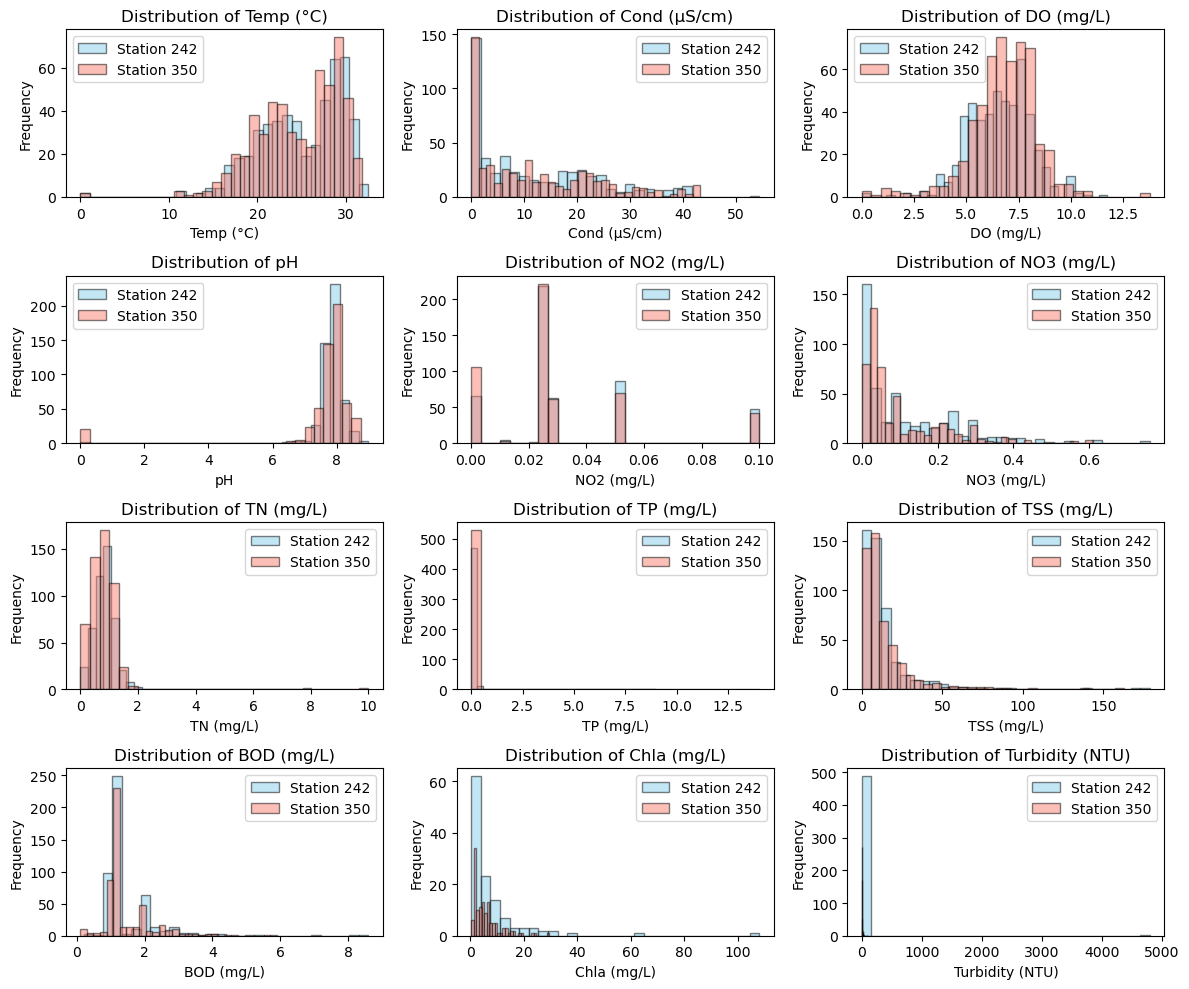

In [21]:
# Filter data by station numbers 242 and 350
station_242 = q_data_river[q_data_river['Station_no'] == 242]
station_350 = q_data_river[q_data_river['Station_no'] == 350]

# Calculate number of columns needed
num_columns = len(numeric_q_data.columns)
num_rows = 4
num_cols = (num_columns + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, column in enumerate(numeric_q_data.columns):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    ax.hist(station_242[column].dropna(), bins=30, alpha=0.5, color='skyblue', edgecolor='black', label='Station 242')
    ax.hist(station_350[column].dropna(), bins=30, alpha=0.5, color='salmon', edgecolor='black', label='Station 350')
    
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')
    ax.legend()

plt.tight_layout()
plt.show()

#### 2.6.2.1 Temperature

Temperature distribution is left-skewed and some values are close to or equal to 0, it might indicate some erroneous or outlier data points. Values close to 0 might not be feasible or accurate for temperature readings.

In [22]:
#Filter the 'Temp (°C)' column to print the values are less than 10 degrees Celsius
q_data_river.loc[q_data_river['Temp (°C)'] < 10]

,Station_no,Type,Date,Temp (°C),Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Chla (mg/L),Turbidity (NTU)
9094,350,River,1992-04-02,0.0,0.0,0.0,0.0,0.0,0.000,0.90,0.06,17.3,1.6,NaN,2.1
9096,350,River,1992-04-02,0.0,0.0,0.0,0.0,0.0,0.000,0.60,0.07,26.0,0.9,NaN,2.2
17205,242,River,1992-09-10,0.0,0.0,0.0,0.0,0.0,0.065,1.07,0.11,5.5,1.3,NaN,4.5
17206,242,River,1992-09-10,0.0,0.0,0.0,0.0,0.0,0.065,0.67,0.12,4.0,1.2,NaN,4.3


Upon reviewing the measurements taken on those days, it was noted that no measurements were recorded for that specific days.

In [23]:
# Replace zero values in 'Temp' column with NaN
q_data_river.loc[q_data_river['Temp (°C)'] == 0, 'Temp (°C)'] = np.nan

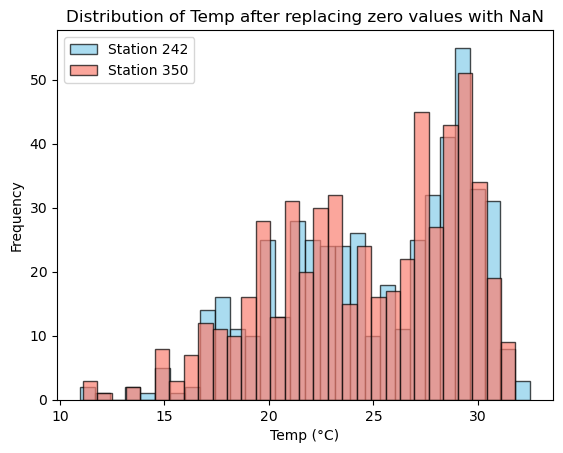

In [24]:
# Filter data for station numbers 242 and 350
station_242 = q_data_river[q_data_river['Station_no'] == 242]
station_350 = q_data_river[q_data_river['Station_no'] == 350]

# Create histograms for 'Temp (°C)' column for station numbers 242 and 350
plt.hist(station_242['Temp (°C)'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Station 242')
plt.hist(station_350['Temp (°C)'].dropna(), bins=30, alpha=0.7, color='salmon', edgecolor='black', label='Station 350')

plt.xlabel('Temp (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temp after replacing zero values with NaN')
plt.legend()
plt.show()

#### 2.6.2.2 pH

pH distribution is also left-skewed and contains values close to or equal to 0. pH values close to 0 are highly unusual and potentially incorrect. A pH scale typically ranges from 0 to 14, where values below 1 or above 13 are rare in natural environments. Values near 0 might indicate measurement errors, data entry mistakes or never measured.

In [25]:
#Filter the 'pH' column to print the values are less than 6
q_data_river.loc[q_data_river['pH'] < 6]

,Station_no,Type,Date,Temp (°C),Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Chla (mg/L),Turbidity (NTU)
772,350,River,1988-10-14,23.30,0.000,6.60,0.0,NaN,NaN,0.910,0.160,NaN,NaN,NaN,0.0
1676,350,River,1988-01-05,19.80,0.000,8.00,0.0,NaN,NaN,0.950,0.130,NaN,NaN,NaN,0.0
2988,350,River,1988-11-15,23.50,0.000,6.80,0.0,NaN,NaN,0.950,0.130,NaN,NaN,NaN,0.0
3571,350,River,1988-01-12,16.00,0.000,7.50,0.0,NaN,NaN,0.507,0.113,NaN,NaN,NaN,0.0
4001,350,River,1993-01-19,20.13,10.140,8.46,0.0,0.0,0.015,0.820,0.120,11.0,1.5,NaN,1.8
4002,350,River,1993-01-19,20.13,10.140,8.42,0.0,0.0,0.015,1.020,0.130,5.5,1.8,NaN,0.0
4003,350,River,1993-01-19,20.62,12.130,7.16,0.0,0.0,0.015,0.320,0.130,22.5,1.3,NaN,2.0
6203,350,River,1988-02-04,21.80,0.000,8.40,0.0,NaN,NaN,1.469,0.051,NaN,NaN,NaN,0.0
7603,350,River,1988-03-02,19.80,0.000,9.00,0.0,NaN,NaN,0.871,0.055,NaN,NaN,NaN,0.0
9094,350,River,1992-04-02,NaN,0.000,0.00,0.0,0.0,0.000,0.900,0.060,17.3,1.6,NaN,2.1


In [26]:
q_data_river.loc[q_data_river['pH'] == 0, 'pH']=np.nan

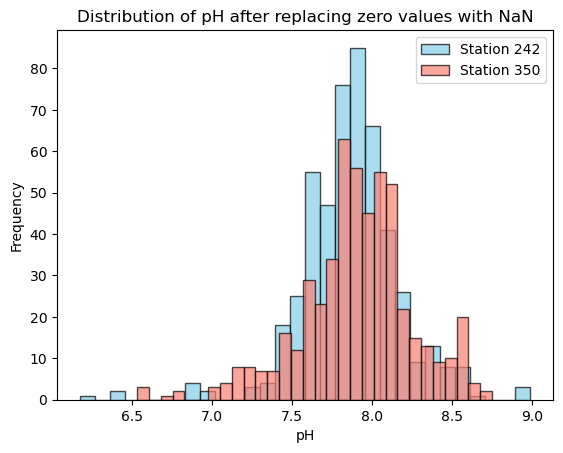

In [27]:
# Filter data for station numbers 242 and 350
station_242 = q_data_river[q_data_river['Station_no'] == 242]
station_350 = q_data_river[q_data_river['Station_no'] == 350]

# Create histograms for 'pH' column for station numbers 242 and 350
plt.hist(station_242['pH'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Station 242')
plt.hist(station_350['pH'].dropna(), bins=30, alpha=0.7, color='salmon', edgecolor='black', label='Station 350')

plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Distribution of pH after replacing zero values with NaN')
plt.legend()
plt.show()

#### 2.6.2.3  TN (mg/L) - Total Nitrogen 

TN distribution is right-skewed with most values clustered between 0 to 2, but some measurements are significantly higher (e.g., 8, 10) for columns 14526, 14527, 14536, 14537 on the same day. The identical values (8, 8, 10, 10) for stations on the same day could indicate potential data entry errors or measurement inaccuracies. 

In [28]:
q_data_river.loc[q_data_river['TN (mg/L)']> 6].T

,10801,14526,14527,14536,14537
Station_no,242,242,242,350,350
Type,River,River,River,River,River
Date,1992-05-05 00:00:00,2022-07-19 00:00:00,2022-07-19 00:00:00,2022-07-19 00:00:00,2022-07-19 00:00:00
Temp (°C),24.64,30.36,30.36,29.6,29.6
Cond (μS/cm),18.7,1.611,1.611,3.316,3.316
DO (mg/L),6.24,6.71,6.71,5.53,5.53
pH,8.51,7.88,7.88,7.57,7.57
NO2 (mg/L),0.0,0.1,0.1,0.1,0.1
NO3 (mg/L),0.0,0.76,0.76,0.44,0.44
TN (mg/L),6.21,8.0,8.0,10.0,10.0


Upon reviewing other TN measurements conducted on the same day, it has been observed that the recorded TN value is 1 mg/L. The initial values (8, 8, 10, 10) previously recorded for columns 14526, 14527, 14536, and 14537 were incorrect or inaccurately documented.

In [29]:
# Replace incorrect TN values in the 'TN' column with the correct value of 1
q_data_river.loc[[14526, 14527, 14536,14537], 'TN (mg/L)'] = 1.0

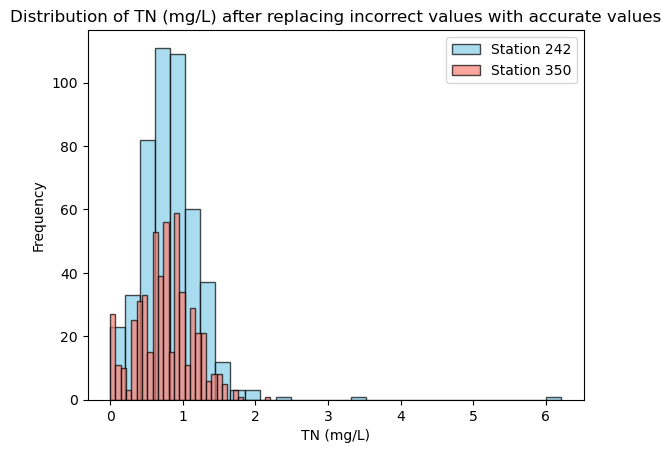

In [30]:
# Filter data for station numbers 242 and 350
station_242 = q_data_river[q_data_river['Station_no'] == 242]
station_350 = q_data_river[q_data_river['Station_no'] == 350]

# Create histograms for 'TN (mg/L)' column for station numbers 242 and 350
plt.hist(station_242['TN (mg/L)'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Station 242')
plt.hist(station_350['TN (mg/L)'].dropna(), bins=30, alpha=0.7, color='salmon', edgecolor='black', label='Station 350')

plt.xlabel('TN (mg/L)')
plt.ylabel('Frequency')
plt.title('Distribution of TN (mg/L) after replacing incorrect values with accurate values')
plt.legend()
plt.show()

#### 2.6.2.4  TP (mg/L) - Total Phosphorus 

TP distribution is primarily clustered around 0, with additional data points scattered between the range of 8 to 14, it indicates a right-skewed distribution with a predominant concentration of values near 0 and a few higher values in the mentioned range. This distribution pattern suggests that most samples have low TP concentrations, likely representing normal conditions, while the outliers in the range of 8 to 14 might signify instances of elevated phosphorus levels in certain measurements.

In [31]:
q_data_river.loc[q_data_river['TP (mg/L)'] > 5].T

,15249,15259,15261
Station_no,242,350,350
Type,River,River,River
Date,2022-08-04 00:00:00,2022-08-04 00:00:00,2022-08-04 00:00:00
Temp (°C),30.86,30.11,30.03
Cond (μS/cm),10.446,10.4,10.639
DO (mg/L),6.25,6.94,6.29
pH,7.85,7.96,7.89
NO2 (mg/L),0.05,0.05,0.05
NO3 (mg/L),0.1,0.1,0.1
TN (mg/L),0.13,0.13,0.13


Upon reevaluation of other samples collected on the same day, it has been verified that the correct TP values for rows 15249, 15259, and 15261 are 0.09, 0.11, and 0.14 mg/L, respectively. These revised values rectify the potential oversight of missing decimals in the dataset.

In [32]:
# Replace incorrect TP values in the 'TP (mg/L)' column with the correct value of 0.09, 0.11, and 0.14
q_data_river.loc[[15249, 15259, 15261], 'TP (mg/L)'] = [0.09, 0.11, 0.14]

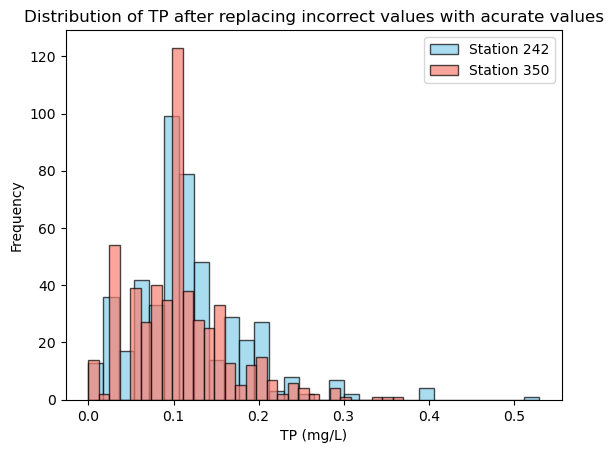

In [33]:
# Filter data for station numbers 242 and 350
station_242 = q_data_river[q_data_river['Station_no'] == 242]
station_350 = q_data_river[q_data_river['Station_no'] == 350]

# Create histograms for 'TP (mg/L)' column for station numbers 242 and 350
plt.hist(station_242['TP (mg/L)'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Station 242')
plt.hist(station_350['TP (mg/L)'].dropna(), bins=30, alpha=0.7, color='salmon', edgecolor='black', label='Station 350')

plt.xlabel('TP (mg/L)')
plt.ylabel('Frequency')
plt.title('Distribution of TP after replacing incorrect values with acurate values')
plt.legend()
plt.show()

#### 2.6.2.5  Chla (mg/L) - Chlorophyll-a

In [34]:
# Check the percentage of missing values of Chla
q_data_river['Chla (mg/L)'].isnull().mean() * 100

76.49812734082397

The 'Chla (mg/L)' column contains a substantial number of missing values, approximately 76.50% of the dataset, which significantly impacts the data's reliability and completeness. As a result, this column will be excluded from the analysis to ensure accurate and dependable insights.

In [35]:
# Drop the 'Chla' column with a very high percentage of missing values
q_data_river = q_data_river.drop(columns = 'Chla (mg/L)')

#### 2.6.2.6  Turbidity (NTU)

The majority of turbidity distribution are concentrated around zero, it suggests that most measurements exhibit low levels of turbidity. However, there are some outlier measurements that are notably higher, around 5000. 

In [36]:
q_data_river.loc[q_data_river['Turbidity (NTU)'] > 1000].T

,14528,14529
Station_no,242,242
Type,River,River
Date,2022-07-19 00:00:00,2022-07-19 00:00:00
Temp (°C),30.31,30.31
Cond (μS/cm),1.664,1.664
DO (mg/L),6.74,6.74
pH,7.89,7.89
NO2 (mg/L),0.1,0.1
NO3 (mg/L),0.61,0.61
TN (mg/L),1.0,1.0


Station number 242 displays a substantially large turbidity dataset. One potential cause might be the presence of erroneous data, where the turbidity values are seemingly derived from another parameter, such as Total Suspended Solids (TSS), measured on the same day. 

In [37]:
# Replace Incorrect Turbidity Values with NaN
q_data_river.loc[[14528, 14529], 'Turbidity (NTU)'] = np.nan

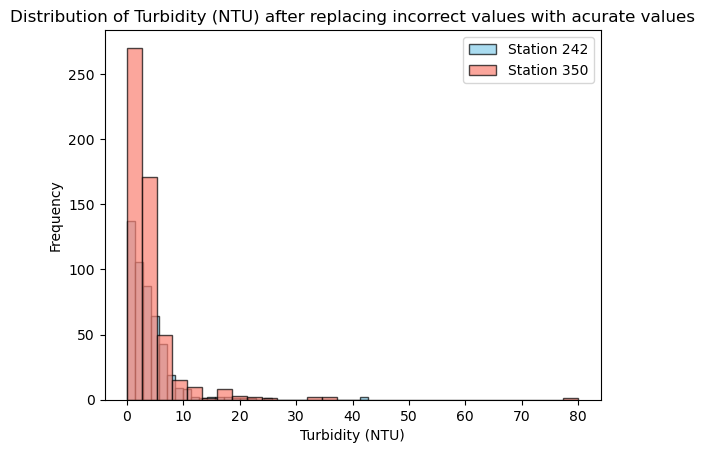

In [38]:
# Filter data for station numbers 242 and 350
station_242 = q_data_river[q_data_river['Station_no'] == 242]
station_350 = q_data_river[q_data_river['Station_no'] == 350]

# Create histograms for 'Turbidity (NTU)' column for station numbers 242 and 350
plt.hist(station_242['Turbidity (NTU)'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Station 242')
plt.hist(station_350['Turbidity (NTU)'].dropna(), bins=30, alpha=0.7, color='salmon', edgecolor='black', label='Station 350')

plt.xlabel('Turbidity (NTU)')
plt.ylabel('Frequency')
plt.title('Distribution of Turbidity (NTU) after replacing incorrect values with acurate values')
plt.legend()
plt.show()

In [39]:
# Display the column names present in the DataFrame 
q_data_river.columns

Index(['Station_no', 'Type', 'Date', 'Temp (°C)', 'Cond (μS/cm)', 'DO (mg/L)',
       'pH', 'NO2 (mg/L)', 'NO3 (mg/L)', 'TN (mg/L)', 'TP (mg/L)',
       'TSS (mg/L)', 'BOD (mg/L)', 'Turbidity (NTU)'],
      dtype='object')

In [40]:
# Impute NaN values with the median
columns_to_convert = ['Temp (°C)', 'Cond (μS/cm)', 'DO (mg/L)', 'pH', 'NO2 (mg/L)', 'NO3 (mg/L)','TN (mg/L)', 'TP (mg/L)', 'TSS (mg/L)', 'BOD (mg/L)', 'Turbidity (NTU)']

for col in columns_to_convert:
    median_val = q_data_river[col].median()
    q_data_river[col].fillna(median_val, inplace=True)

In [41]:
q_data_river.isnull().sum()

Station_no         0
Type               0
Date               0
Temp (°C)          0
Cond (μS/cm)       0
DO (mg/L)          0
pH                 0
NO2 (mg/L)         0
NO3 (mg/L)         0
TN (mg/L)          0
TP (mg/L)          0
TSS (mg/L)         0
BOD (mg/L)         0
Turbidity (NTU)    0
dtype: int64

### 2.6.2 Review Distribution of Feature Values

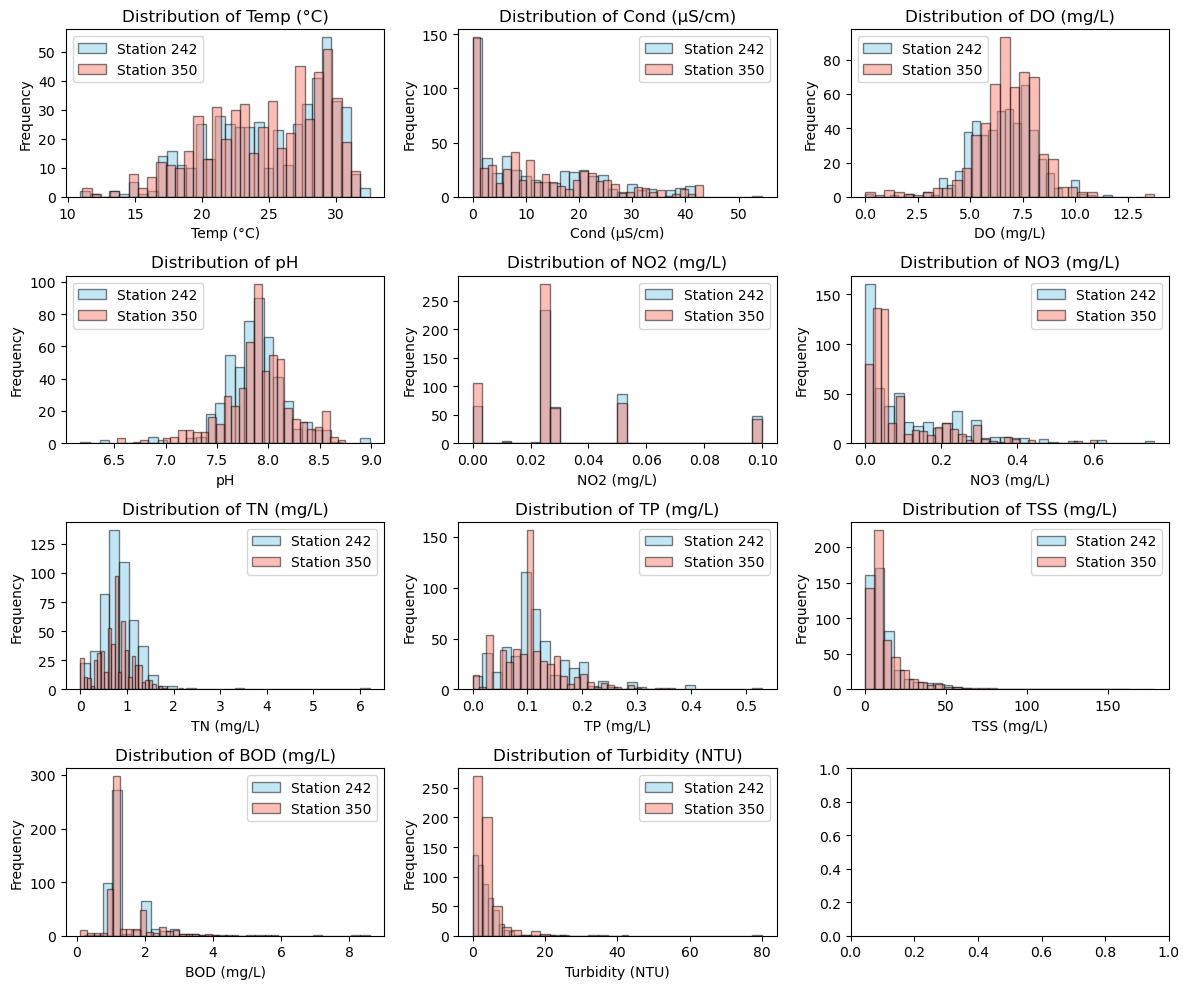

In [42]:
# Filter data by station numbers 242 and 350
station_242 = q_data_river[q_data_river['Station_no'] == 242]
station_350 = q_data_river[q_data_river['Station_no'] == 350]

num_columns = len(columns_to_convert)
num_rows = 4  # Number of rows for layout
num_cols = (num_columns + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, column in enumerate(columns_to_convert):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Select axis
    
    ax.hist(station_242[column].dropna(), bins=30, alpha=0.5, color='skyblue', edgecolor='black', label='Station 242')
    ax.hist(station_350[column].dropna(), bins=30, alpha=0.5, color='salmon', edgecolor='black', label='Station 350')
    
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')
    ax.legend()

plt.tight_layout()
plt.show()


## 2.7 Water Quality Index (WQI)

### 2.7.1 Calculation of Weighted Aritmethic Index Method (Brown et.al., 1972) 

WQI is used to be calculated using water quality parameters including 'Cond (μS/cm)', 'DO (mg/L)', 'pH', 'Turbidity (NTU)', 'TP (mg/L)', 'TN (mg/L)', 'NO2 (mg/L)', 'NO3 (mg/L)', 'TSS (mg/L)', and 'BOD (mg/L) that significantly affect water quality. The WQI is calculated using the formula:


$$WQI = \frac{\sum_{i=1}^{n} q_i \cdot w_i}{\sum_{i=1}^{n} w_i}$$

where:
- n is the number of water quality parameters.
- qi is the sub-index value for parameter i.
- wi is the unit weight factor for parameter i.


The sub-index (qi) for each parameter is calculated as the percentage deviation of the observed value (Vi) from the standard desirable value (Si):


$$q_{i} = \frac{{V_{i} - V_ideal}}{{S_i - V_ideal}} \times 100$$


where:
- Vi is the observed value for parameter i.
- Si is the standard desirable value for parameter i.
- Videal is an ideal value or target value for parameter i.


The unit weight factor (wi) for each parameter calculated as follows:


$$wi= \frac{K}{Si}$$


where:
- K is the normalization factor that can be calculated as follows:


$$K = \frac{1}{\sum \frac{1}{S_i}} \$$


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 148 to 17944
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Station_no       1068 non-null   int64         
 1   Type             1068 non-null   object        
 2   Date             1068 non-null   datetime64[ns]
 3   Temp (°C)        1068 non-null   float64       
 4   Cond (μS/cm)     1068 non-null   float64       
 5   DO (mg/L)        1068 non-null   float64       
 6   pH               1068 non-null   float64       
 7   NO2 (mg/L)       1068 non-null   float64       
 8   NO3 (mg/L)       1068 non-null   float64       
 9   TN (mg/L)        1068 non-null   float64       
 10  TP (mg/L)        1068 non-null   float64       
 11  TSS (mg/L)       1068 non-null   float64       
 12  BOD (mg/L)       1068 non-null   float64       
 13  Turbidity (NTU)  1068 non-null   float64       
dtypes: datetime64[ns](1), float64(11), in

In [44]:
# Columns to calculate WQI
columns_to_calculate_wqi = ["Cond (μS/cm)", "DO (mg/L)", "pH", "NO2 (mg/L)", "NO3 (mg/L)", "TN (mg/L)", "TP (mg/L)", "TSS (mg/L)", "BOD (mg/L)", "Turbidity (NTU)"]

# Standard desirable value for parameter i (si).
si = np.array([300, 5, 7.5, 3, 45, 5, 1, 5, 5, 5])

# ideal value for parameter i (vIdeal)
vIdeal = np.array([0, 14.6, 7, 0, 0, 0, 0, 0, 0, 0])

# Calculate the normalization factor (K)
K = 1 / np.sum(1 / si)

# Calculate the unit weight vector for parameter i (wi).
wi = K / si

# Define a function to calculate WQI for a sample
def calc_wqi(sample):
    qi = ((sample - vIdeal) / (si - vIdeal))*100
    wqi = np.dot(qi, wi)
    return wqi

# Filter data by station numbers 242 and 350
station_242 = q_data_river[q_data_river['Station_no'] == 242]
station_350 = q_data_river[q_data_river['Station_no'] == 350]

# Calculate mean values for each parameter for each station
mean_values_242 = station_242[columns_to_calculate_wqi].mean()
mean_values_350 = station_350[columns_to_calculate_wqi].mean()

# Calculate WQI for each station using mean values
wqi_242 = calc_wqi(mean_values_242)
wqi_350 = calc_wqi(mean_values_350)

# Display the results
print("WQI for Station 242:", wqi_242)
print("WQI for Station 350:", wqi_350)

q_data_river['WQI'] = q_data_river[columns_to_calculate_wqi].apply(calc_wqi, axis=1)

WQI for Station 242: 51.68243340375062
WQI for Station 350: 51.368919848795365


In [45]:
q_data_river.head()

,Station_no,Type,Date,Temp (°C),Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI
148,242,River,2019-10-03,27.03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,1.7,36.042485
149,242,River,2019-10-03,27.24,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.878936
150,242,River,2019-10-03,27.22,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,2.7,39.179552
154,350,River,2019-10-03,27.07,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.759645
155,350,River,2019-10-03,27.08,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,1.9,37.212797


### 2.7.2 Classification of WQI

In [46]:
# Create a function to classify WQI
def classify_wqi(wqi):
    if wqi < 25:
        return "Excellent (4)"
    elif 26 <= wqi <= 50:
        return "Good (3)"
    elif 51 <= wqi <= 75:
        return "Poor (2)"
    elif 76 <= wqi <= 100:
        return "Very Poor (1)"
    else:
        return "Unfit for consumption (0)"

q_data_river['Water Quality Classification'] = q_data_river['WQI'].apply(classify_wqi)

In [47]:
q_data_river.head()

,Station_no,Type,Date,Temp (°C),Cond (μS/cm),DO (mg/L),pH,NO2 (mg/L),NO3 (mg/L),TN (mg/L),TP (mg/L),TSS (mg/L),BOD (mg/L),Turbidity (NTU),WQI,Water Quality Classification
148,242,River,2019-10-03,27.03,23.85,6.72,7.85,0.1,0.1,0.7,0.1,5.5,2.0,1.7,36.042485,Good (3)
149,242,River,2019-10-03,27.24,25.01,6.36,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.878936,Good (3)
150,242,River,2019-10-03,27.22,25.29,6.36,7.80,0.1,0.1,0.8,0.1,6.5,2.0,2.7,39.179552,Good (3)
154,350,River,2019-10-03,27.07,19.94,6.50,7.81,0.1,0.1,0.8,0.1,6.0,2.0,1.7,36.759645,Good (3)
155,350,River,2019-10-03,27.08,20.11,6.47,7.82,0.1,0.1,0.8,0.1,6.0,2.0,1.9,37.212797,Good (3)


### 2.7.3 Save Data

In [48]:
q_data_river.shape

(1068, 16)

In [51]:
# # Define the file path where I want to save the CSV file
file_path = "/Users/aysebusra/Desktop/Springboard/Capstone_2/water_quality_index.csv"
#Save the q_data_river DataFrame to a new CSV file using the to_csv() method

q_data_river.to_csv(file_path, index=False)